#Import Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv(r'C:\Users\Acer\Downloads\archive\survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#EDA

In [ ]:
# Melihat keterangan dataset yang sudah diekstrak seperti jumlah data, kolom, dll
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
data = data.drop("comments", axis = 1)

In [ ]:
data = data.drop("Timestamp", axis = 1)

In [ ]:
data

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [ ]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
from scipy.stats import kurtosis, skew


# Fungsi untuk menghitung deskripsi statistik
def descriptive_statistics(data):
    stats = {
        'mean': data.mean(),
        'min': data.min(),
        'max': data.max(),
        'std': data.std(),
        'kurtosis': kurtosis(data, nan_policy='omit'),
        'skew': skew(data, nan_policy='omit')
    }
    return pd.DataFrame(stats)

# Hanya menggunakan kolom numerik untuk analisis
numerical_data = data.select_dtypes(include='number')

# Menghitung statistik
result = descriptive_statistics(numerical_data)

# Menampilkan hasil
print(result)


             mean   min          max           std     kurtosis       skew
Age  7.942815e+07 -1726  99999999999  2.818299e+09  1254.000795  35.440102


In [ ]:
# Melihat tipe data dari dataset yang ada
data.dtypes

Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

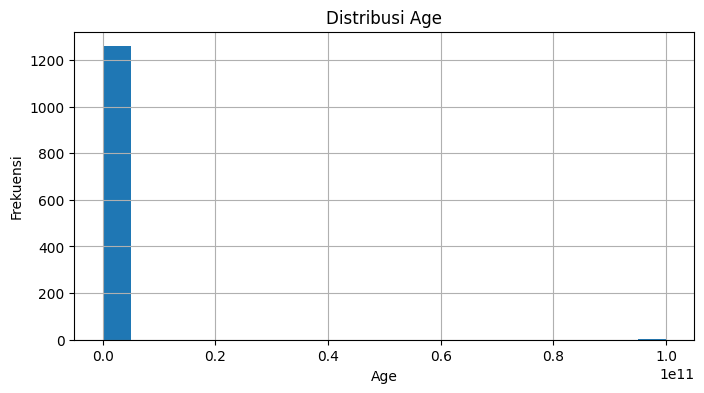

In [ ]:
import matplotlib.pyplot as plt

# Mendapatkan kolom numerik
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Visualisasi histogram untuk setiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    data[col].hist(bins=20)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi {col}')
    plt.show()

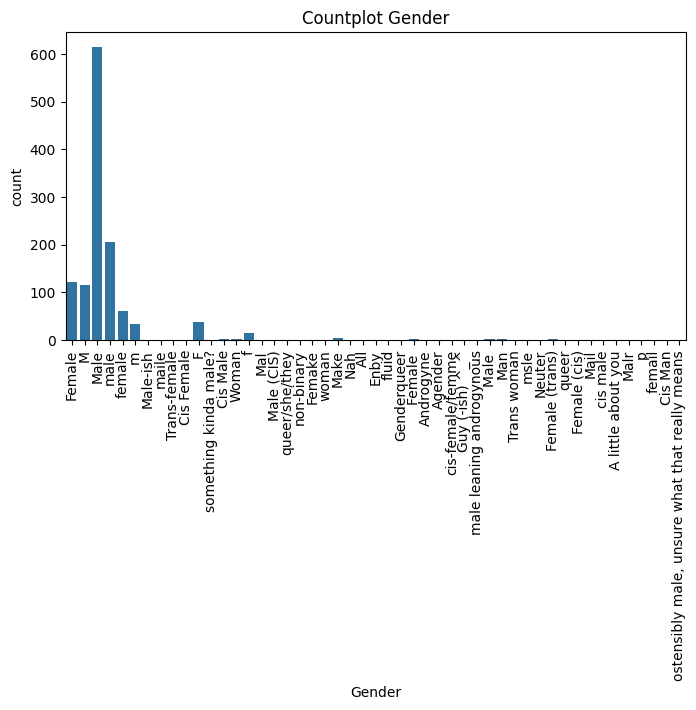

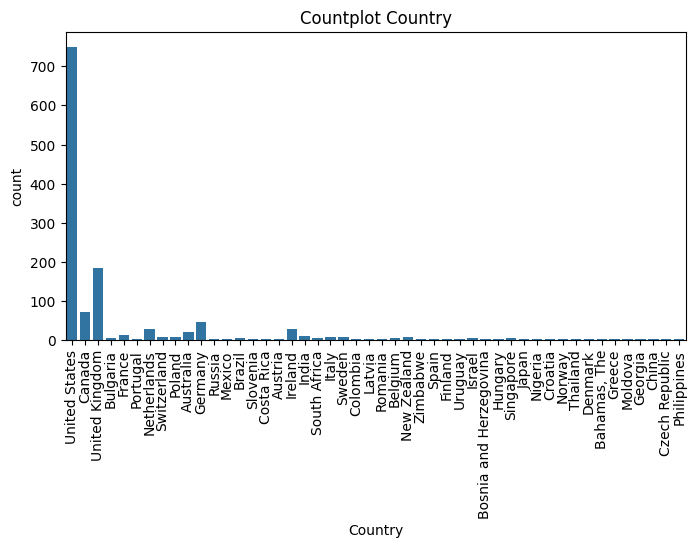

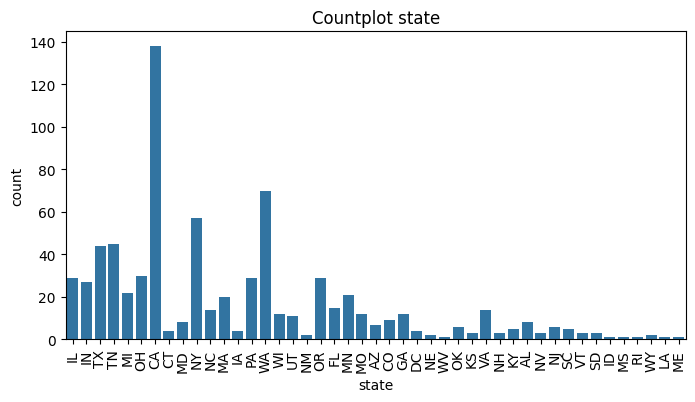

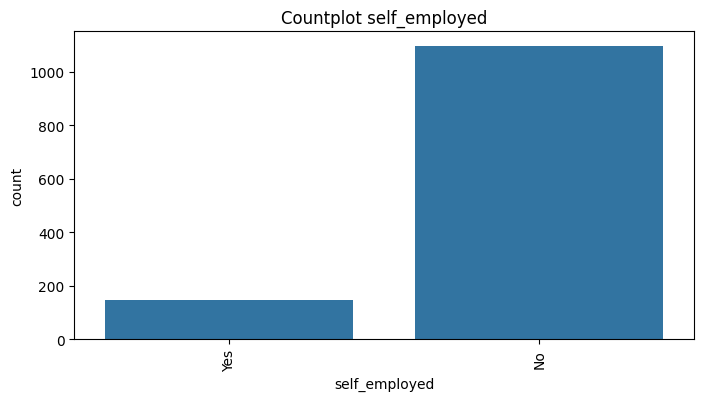

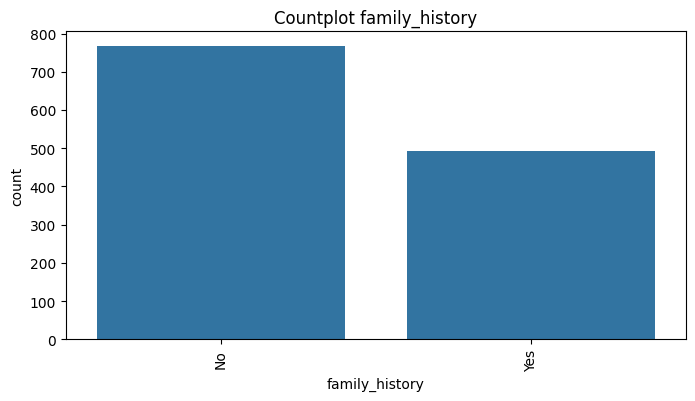

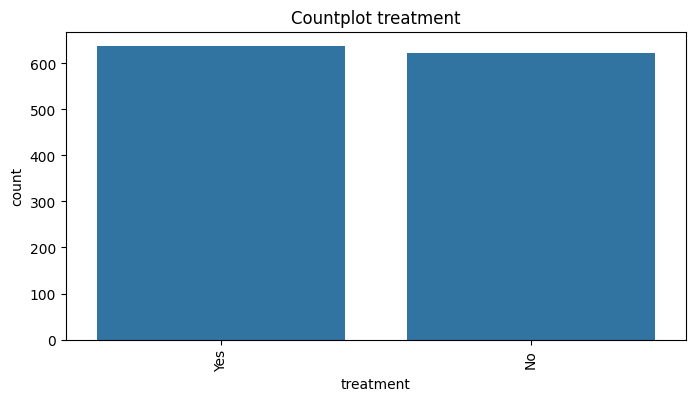

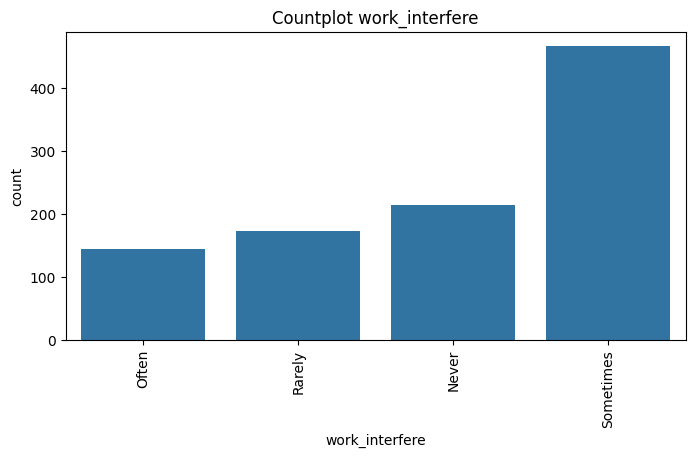

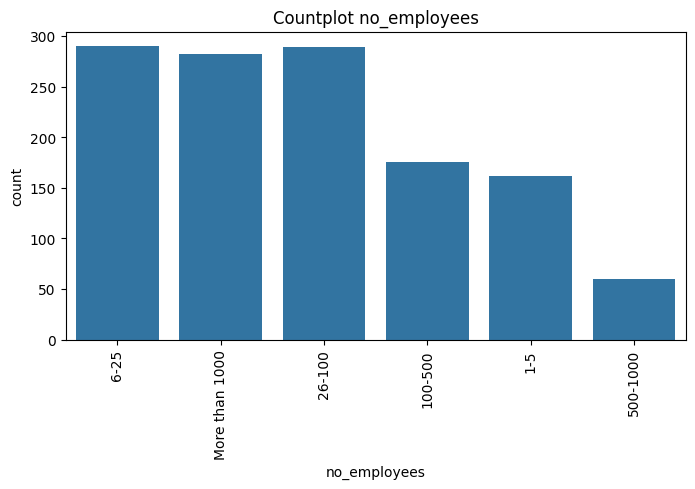

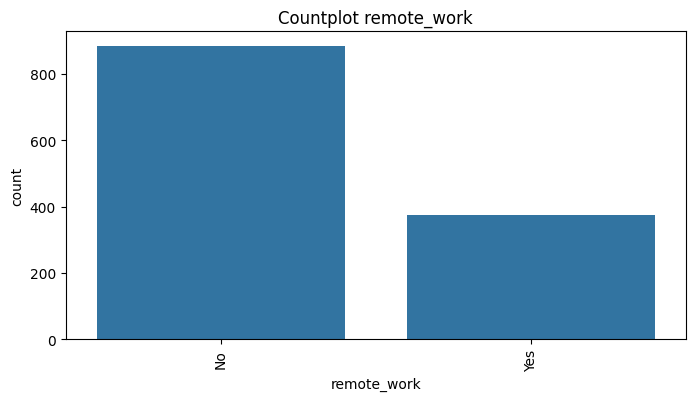

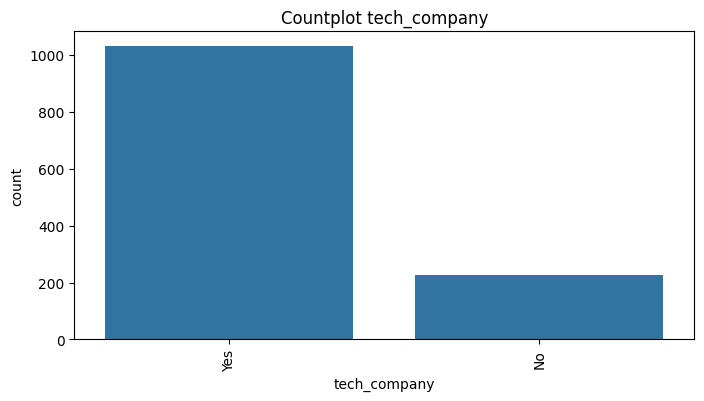

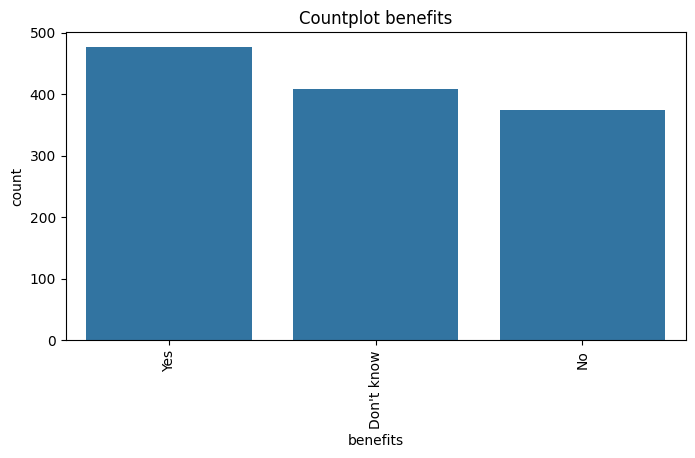

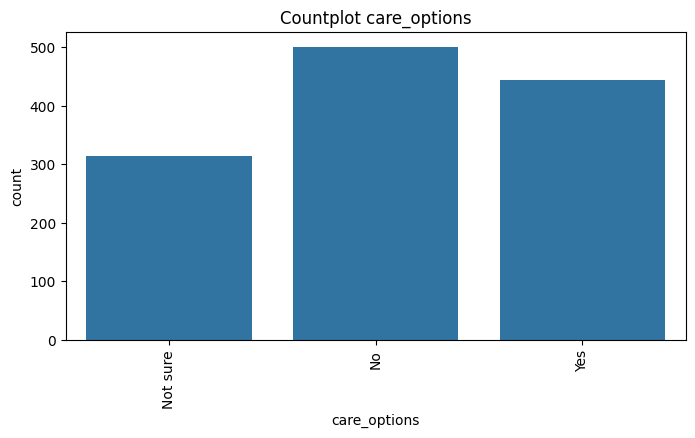

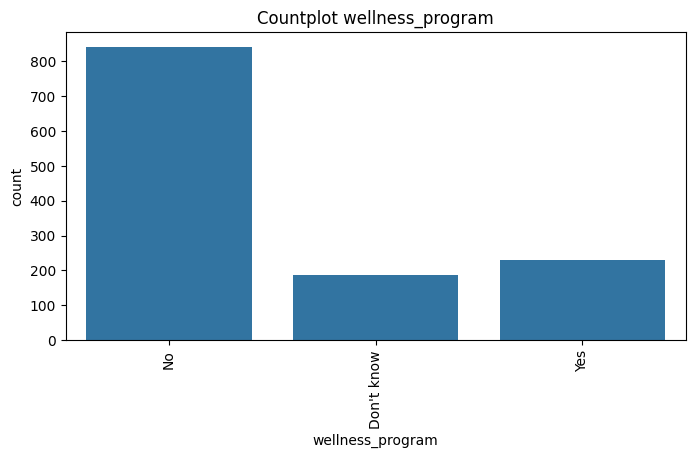

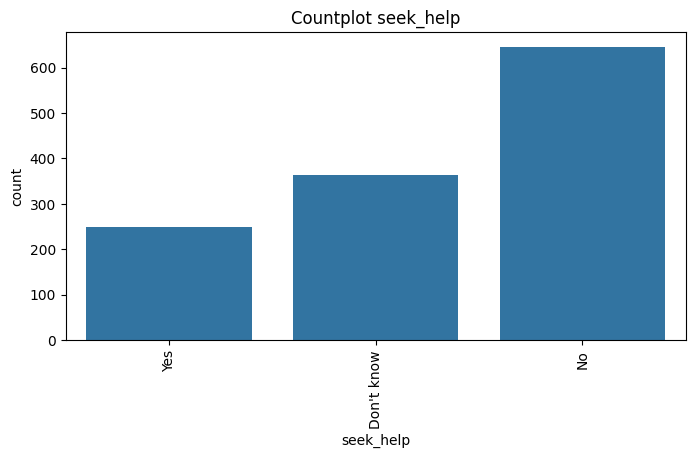

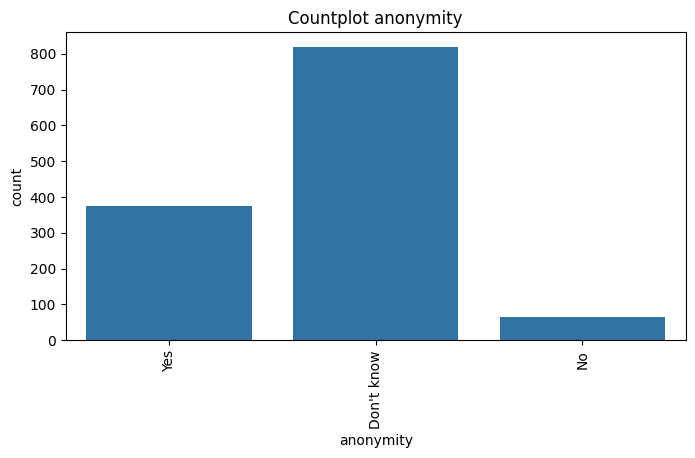

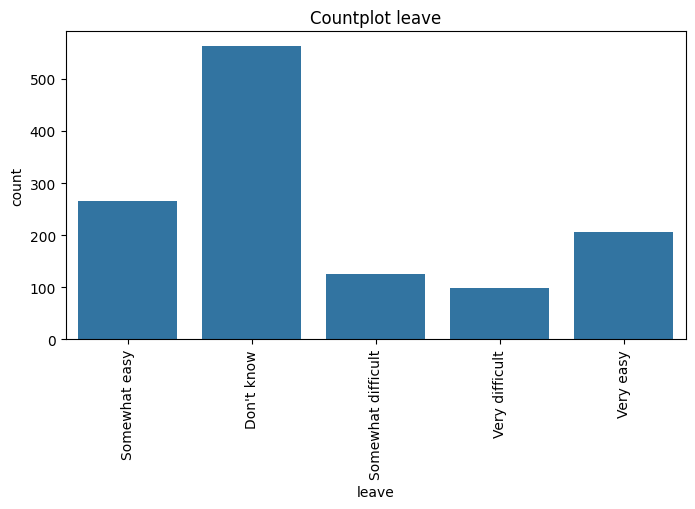

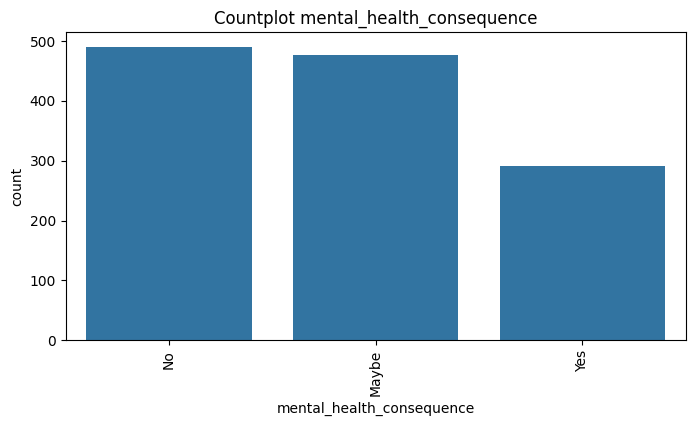

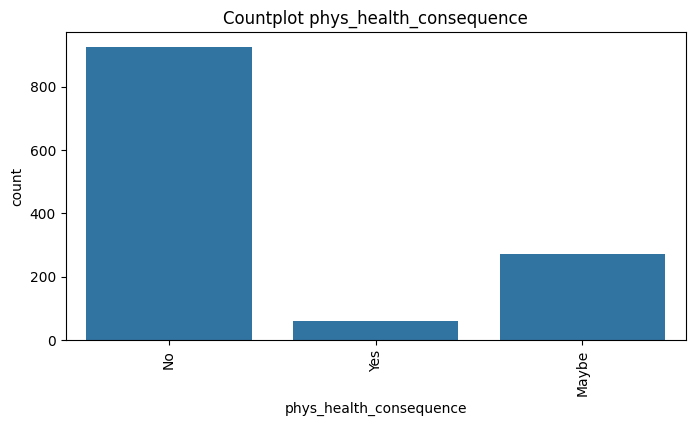

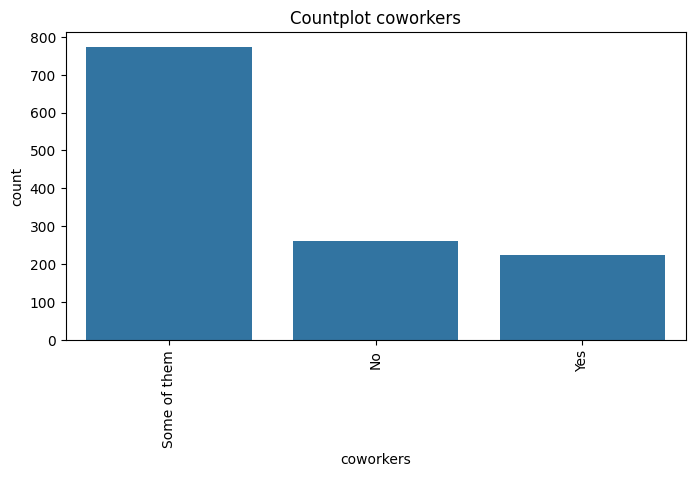

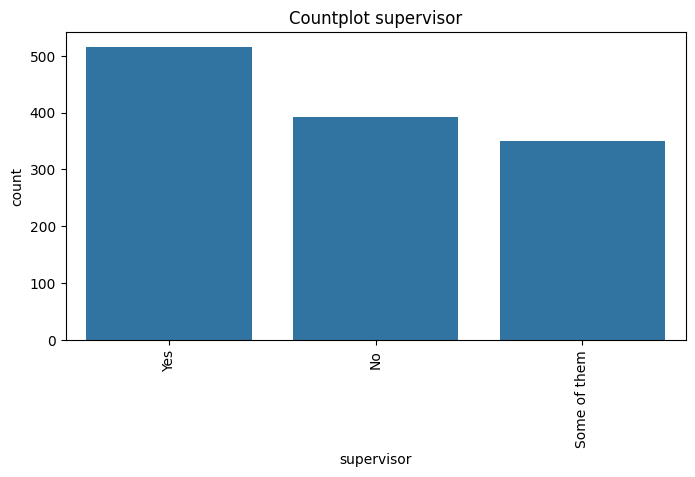

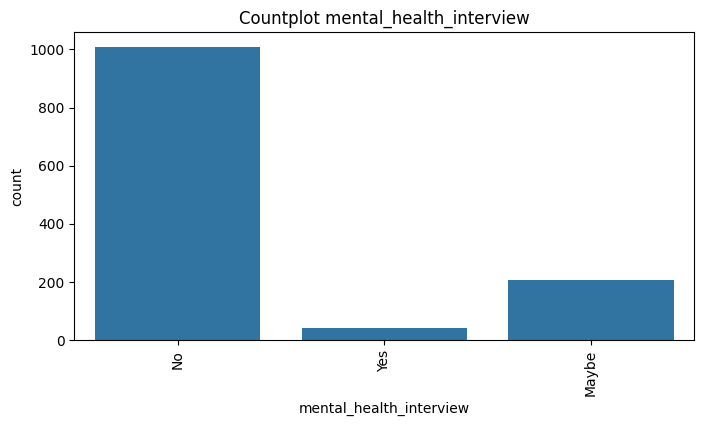

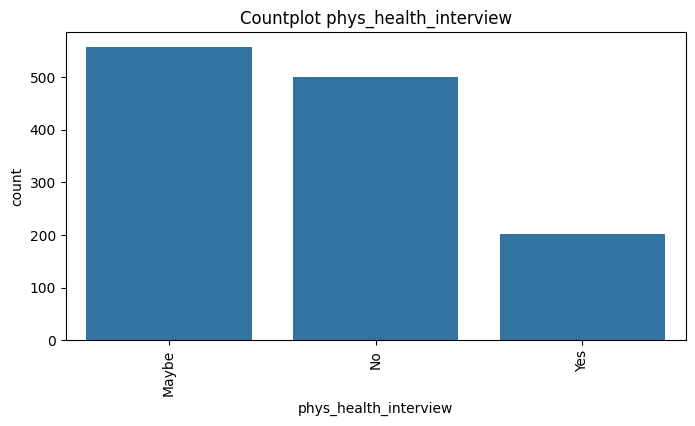

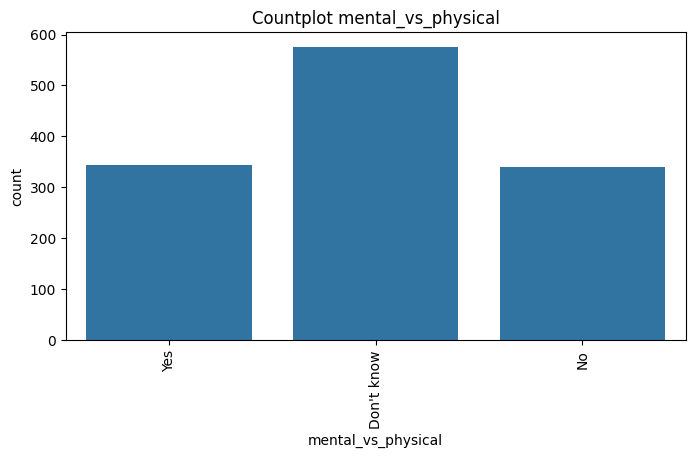

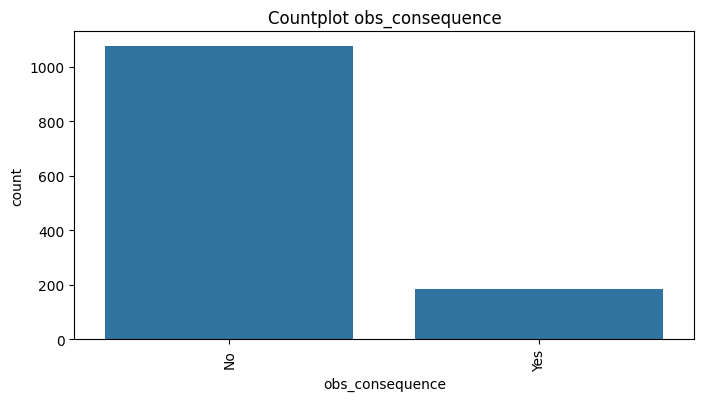

In [ ]:
import seaborn as sns

# Mendapatkan kolom kategorikal
categorical_cols = data.select_dtypes(include=['object']).columns

# Visualisasi countplot untuk setiap kolom kategorikal
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Countplot {col}')
    plt.xticks(rotation=90)  # Jika ada label yang panjang
    plt.show()

**Visualisasi**

In [ ]:
value_counts = data['mental_health_interview'].value_counts()
print(value_counts)

mental_health_interview
No       1008
Maybe     207
Yes        44
Name: count, dtype: int64


#Pre-processing

##Checking Missing Values

In [ ]:
# Menghitung jumlah baris duplikat
num_duplicates = data.duplicated().sum()
print(f"Jumlah baris duplikat: {num_duplicates}")

Jumlah baris duplikat: 4


In [ ]:
# Menghapus duplikat berdasarkan semua kolom
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1255 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1255 non-null   int64 
 1   Gender                     1255 non-null   object
 2   Country                    1255 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1237 non-null   object
 5   family_history             1255 non-null   object
 6   treatment                  1255 non-null   object
 7   work_interfere             992 non-null    object
 8   no_employees               1255 non-null   object
 9   remote_work                1255 non-null   object
 10  tech_company               1255 non-null   object
 11  benefits                   1255 non-null   object
 12  care_options               1255 non-null   object
 13  wellness_program           1255 non-null   object
 14  seek_help    

In [ ]:
#melihat missing values yang terdapat dalam dataset
data.isnull().sum()

Age                            0
Gender                         0
Country                        0
state                        511
self_employed                 18
family_history                 0
treatment                      0
work_interfere               263
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [ ]:
data = data.fillna("Missing")

In [ ]:
columns = [
    "Gender",
    "Country",
    "state",
    "self_employed",
    "family_history",
    "treatment",
    "work_interfere",
    "no_employees",
    "remote_work",
    "tech_company",
    "benefits",
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "leave",
    "mental_health_consequence",
    "phys_health_consequence",
    "coworkers",
    "supervisor",
    "mental_health_interview",
    "phys_health_interview",
    "mental_vs_physical",
    "obs_consequence"
]


##Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in data.columns:
    if data[col].dtype == "object":  # Encode hanya kolom bertipe object
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])

data

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,10,45,10,0,0,1,2,4,0,...,2,2,1,1,1,2,1,0,2,0
1,44,16,45,11,0,0,0,3,5,0,...,0,0,0,1,0,0,1,1,0,0
2,32,20,7,22,0,0,0,3,4,0,...,0,1,1,1,2,2,2,2,1,0
3,31,20,44,22,0,1,1,2,2,0,...,1,1,2,2,1,0,0,0,1,1
4,31,20,45,38,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,39,44,22,1,0,1,0,2,0,...,0,2,1,1,1,1,1,1,0,0
1255,32,20,45,10,1,1,1,2,2,1,...,2,1,1,1,1,2,1,1,2,0
1256,34,39,45,2,1,1,1,4,5,0,...,0,1,2,2,0,0,1,1,1,0
1257,46,33,45,23,1,0,0,0,1,1,...,0,0,2,1,0,0,1,1,1,0


In [ ]:
# Hapus baris dengan Age < 0 atau Age > 100
data = data[(data['Age'] >= 0) & (data['Age'] <= 100)]
print("\nData setelah dibersihkan:\n", data)


Data setelah dibersihkan:
       Age  Gender  Country  state  self_employed  family_history  treatment  \
0      37      10       45     10              0               0          1   
1      44      16       45     11              0               0          0   
2      32      20        7     22              0               0          0   
3      31      20       44     22              0               1          1   
4      31      20       45     38              0               0          0   
...   ...     ...      ...    ...            ...             ...        ...   
1254   26      39       44     22              1               0          1   
1255   32      20       45     10              1               1          1   
1256   34      39       45      2              1               1          1   
1257   46      33       45     23              1               0          0   
1258   25      20       45     10              1               1          1   

      work_interfere  n

In [ ]:
from scipy.stats import kurtosis, skew


# Fungsi untuk menghitung deskripsi statistik
def descriptive_statistics(data):
    stats = {
        'mean': data.mean(),
        'min': data.min(),
        'max': data.max(),
        'std': data.std(),
        'kurtosis': kurtosis(data, nan_policy='omit'),
        'skew': skew(data, nan_policy='omit')
    }
    return pd.DataFrame(stats)

# Hanya menggunakan kolom numerik untuk analisis
numerical_data = data.select_dtypes(include='number')

# Menghitung statistik
result = descriptive_statistics(numerical_data)

# Menampilkan hasil
print(result)

                              mean  min  max        std  kurtosis      skew
Age                        32.0240    5   72   7.384080  1.939140  0.909515
Gender                     22.8608    0   48   9.709544 -0.725505  0.580664
Country                    37.7928    0   46  13.334981  1.067249 -1.622573
state                      22.1056    0   45  11.437373 -0.490686 -0.158313
self_employed               1.1000    0    2   0.344812  3.818182  1.547357
family_history              0.3904    0    1   0.488035 -1.798105  0.449328
treatment                   0.5048    0    1   0.500177 -1.999631 -0.019201
work_interfere              2.2896    0    4   1.596424 -1.543695 -0.240547
no_employees                2.7864    0    5   1.738733 -1.346866 -0.155601
remote_work                 0.2984    0    1   0.457739 -1.223480  0.881204
tech_company                0.8200    0    1   0.384341  0.775068 -1.665853
benefits                    1.0528    0    2   0.838674 -1.570229 -0.099581
care_options

##Handling Missing Values

In [ ]:
from sklearn.impute import KNNImputer

#Terapkan KNN Imputer
imputer = KNNImputer(n_neighbors=10)
data_imputed = imputer.fit_transform(data)

In [ ]:
data.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [ ]:
data

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,10,45,10,0,0,1,2,4,0,...,2,2,1,1,1,2,1,0,2,0
1,44,16,45,11,0,0,0,3,5,0,...,0,0,0,1,0,0,1,1,0,0
2,32,20,7,22,0,0,0,3,4,0,...,0,1,1,1,2,2,2,2,1,0
3,31,20,44,22,0,1,1,2,2,0,...,1,1,2,2,1,0,0,0,1,1
4,31,20,45,38,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,39,44,22,1,0,1,0,2,0,...,0,2,1,1,1,1,1,1,0,0
1255,32,20,45,10,1,1,1,2,2,1,...,2,1,1,1,1,2,1,1,2,0
1256,34,39,45,2,1,1,1,4,5,0,...,0,1,2,2,0,0,1,1,1,0
1257,46,33,45,23,1,0,0,0,1,1,...,0,0,2,1,0,0,1,1,1,0


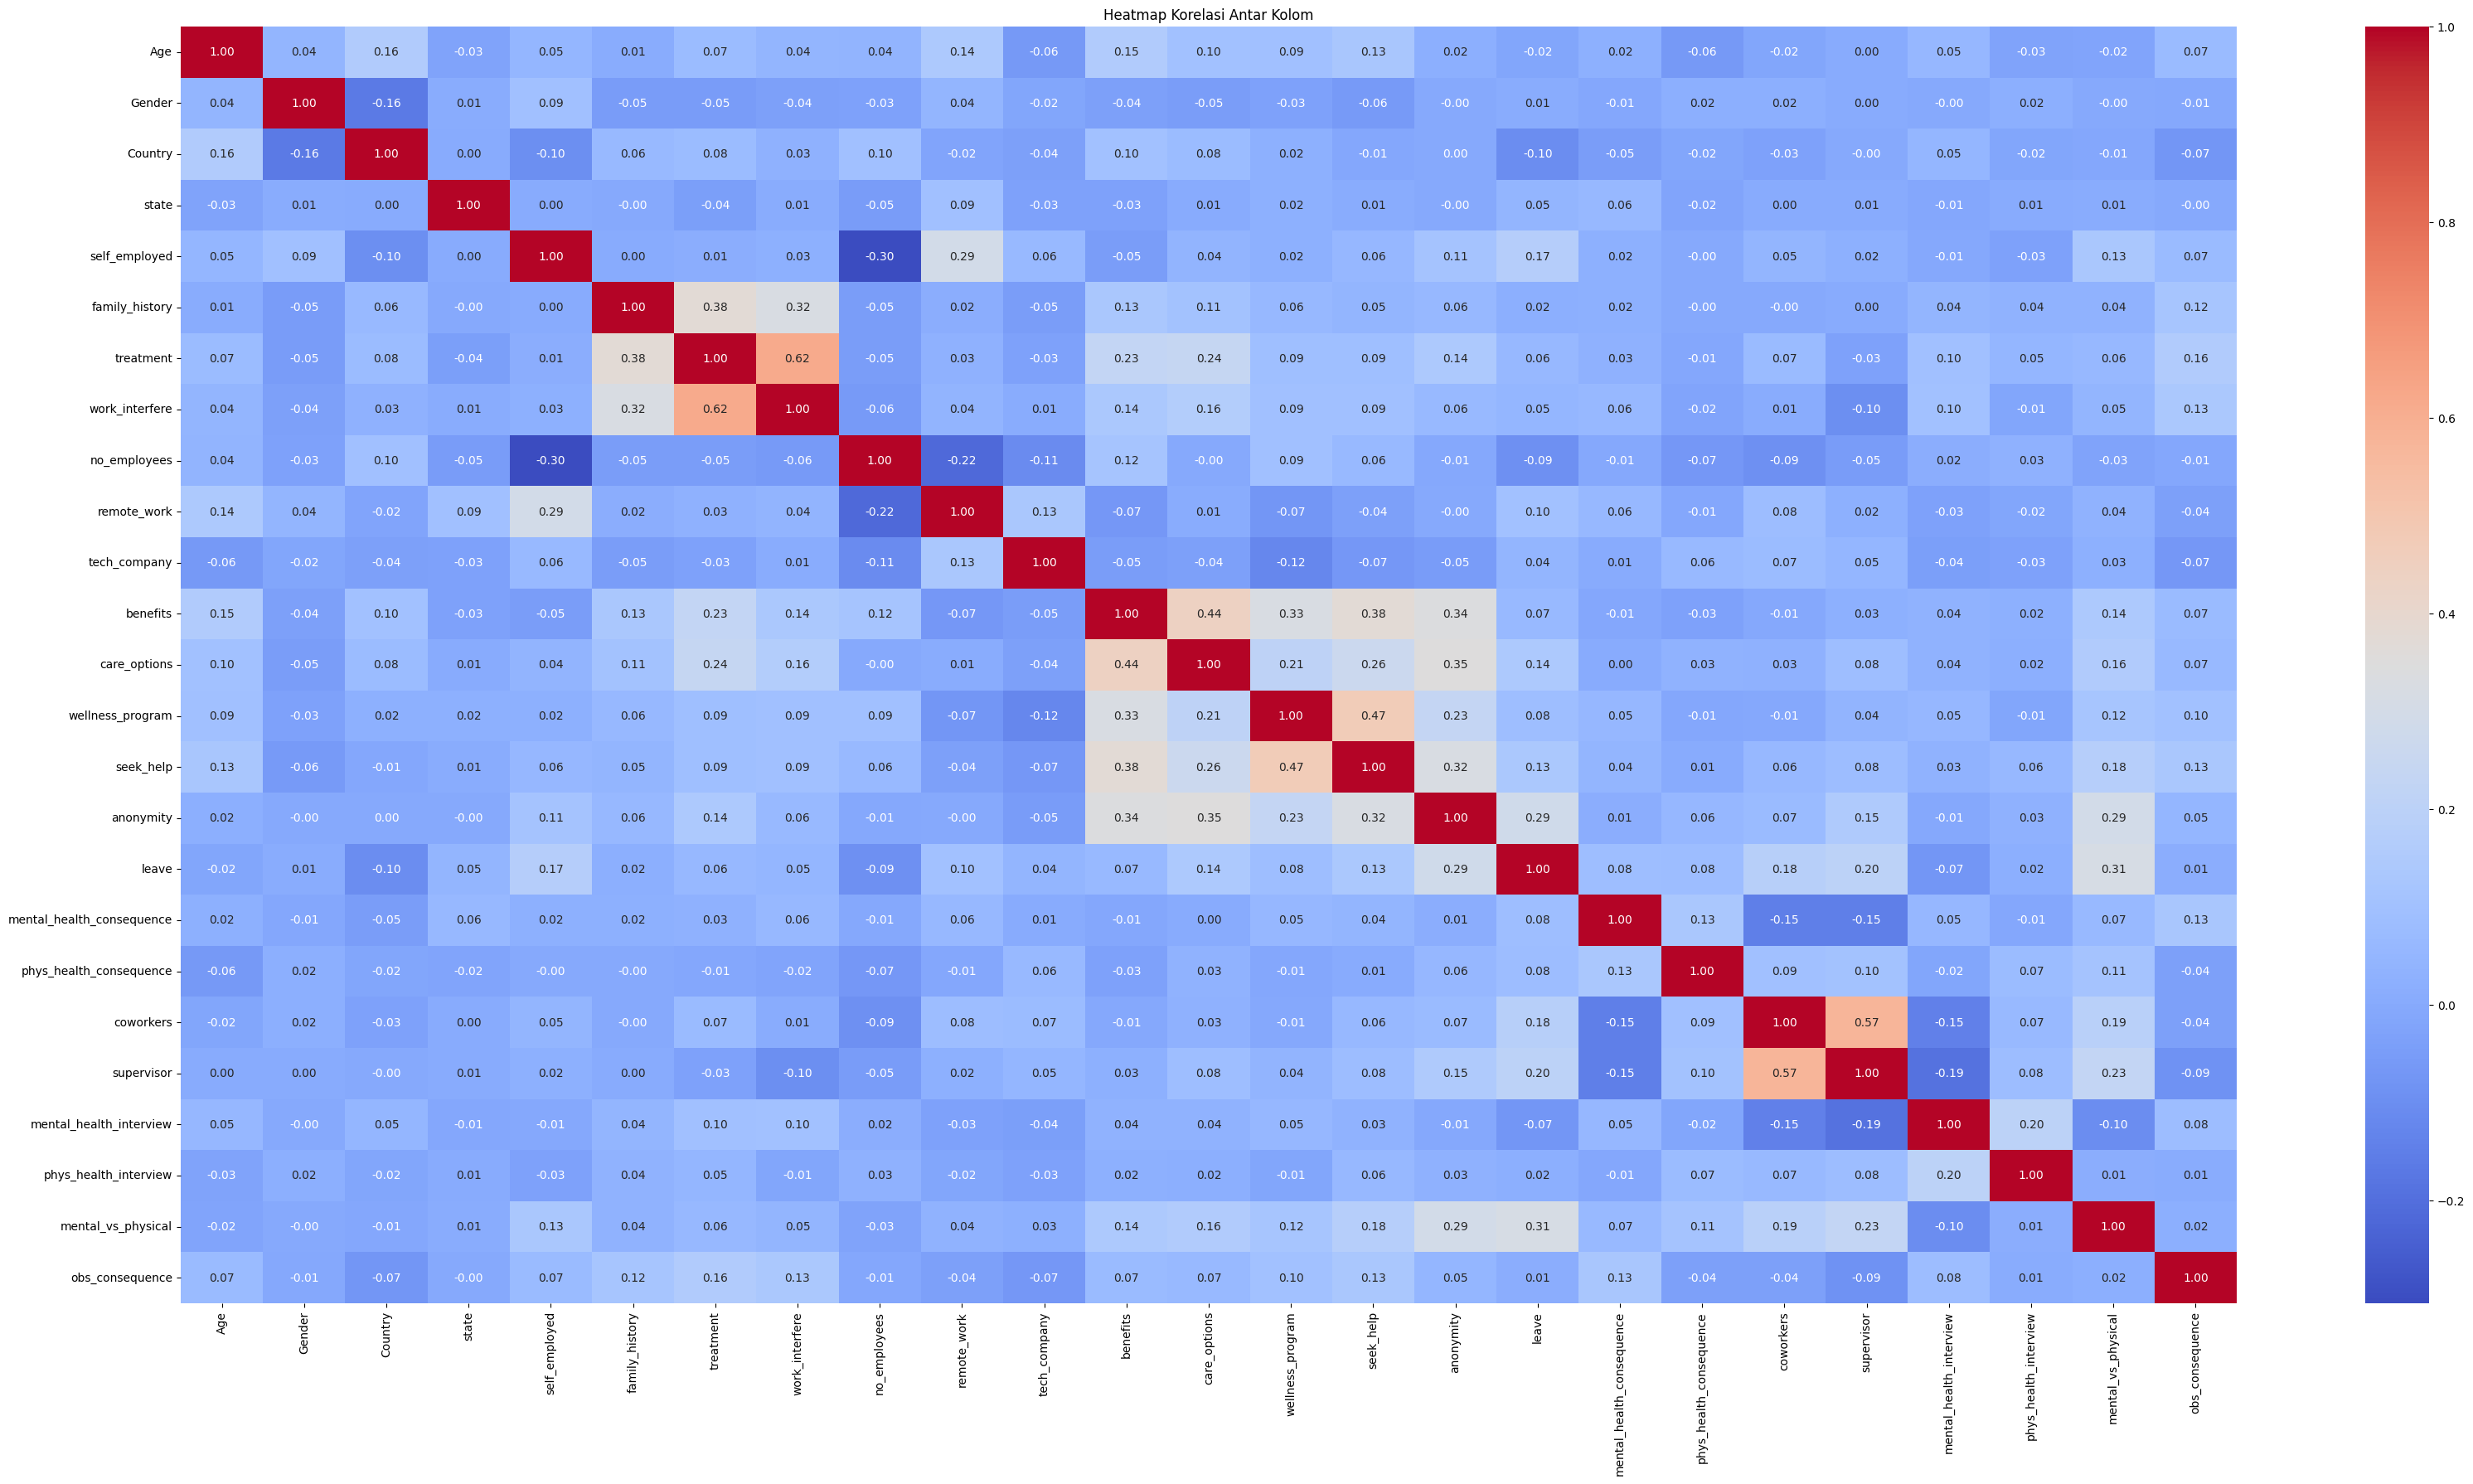

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mencari korelasi antar kolom
correlation_matrix = data.corr()

# Menciptakan heatmap dari matriks korelasi dengan dimensi yang lebih besar
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

In [ ]:
# Menentukan variabel x sebagai semua kolom kecuali "mental_health_interview"
X = data.drop("mental_health_interview", axis=1)

In [ ]:
# Membuat variabel y dengan kolom "mental_health_interview"
y = data["mental_health_interview"]

##Normalisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_normalize = pd.DataFrame(MinMaxScaler().fit_transform(X), columns = X.columns)
X_normalize

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,phys_health_interview,mental_vs_physical,obs_consequence
0,0.477612,0.208333,0.978261,0.222222,0.0,0.0,1.0,0.50,0.8,0.0,...,1.0,1.0,0.50,0.5,0.5,0.5,1.0,0.0,1.0,0.0
1,0.582090,0.333333,0.978261,0.244444,0.0,0.0,0.0,0.75,1.0,0.0,...,0.0,0.0,0.00,0.0,0.5,0.0,0.0,0.5,0.0,0.0
2,0.402985,0.416667,0.152174,0.488889,0.0,0.0,0.0,0.75,0.8,0.0,...,0.5,0.0,0.25,0.5,0.5,1.0,1.0,1.0,0.5,0.0
3,0.388060,0.416667,0.956522,0.488889,0.0,1.0,1.0,0.50,0.4,0.0,...,0.5,0.5,0.25,1.0,1.0,0.5,0.0,0.0,0.5,1.0
4,0.388060,0.416667,0.978261,0.844444,0.0,0.0,0.0,0.25,0.2,1.0,...,0.0,0.0,0.00,0.5,0.5,0.5,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.313433,0.812500,0.956522,0.488889,0.5,0.0,1.0,0.00,0.4,0.0,...,0.5,0.0,0.50,0.5,0.5,0.5,0.5,0.5,0.0,0.0
1246,0.402985,0.416667,0.978261,0.222222,0.5,1.0,1.0,0.50,0.4,1.0,...,0.5,1.0,0.25,0.5,0.5,0.5,1.0,0.5,1.0,0.0
1247,0.432836,0.812500,0.978261,0.044444,0.5,1.0,1.0,1.00,1.0,0.0,...,0.5,0.0,0.25,1.0,1.0,0.0,0.0,0.5,0.5,0.0
1248,0.611940,0.687500,0.978261,0.511111,0.5,0.0,0.0,0.00,0.2,1.0,...,0.5,0.0,0.00,1.0,0.5,0.0,0.0,0.5,0.5,0.0


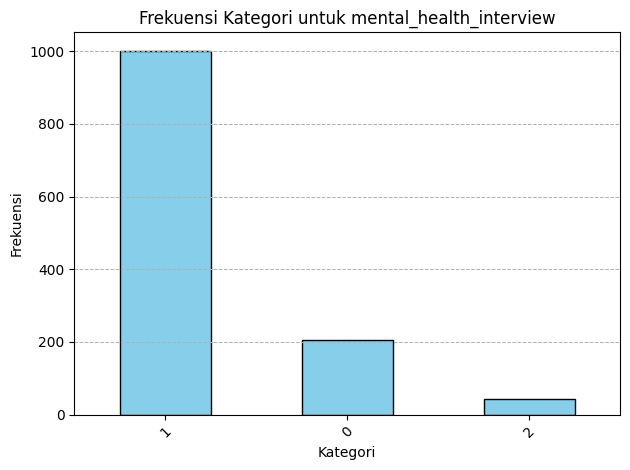

In [ ]:
import pandas as pd

# Analisis untuk kolom kategorikal
categorical_columns = ['mental_health_interview']  # Tambahkan 'mental_health_interview' ke dalam list
for col in categorical_columns:
    # Plotting bar chart
    value_counts = data[col].value_counts()
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Frekuensi Kategori untuk {col}')
    plt.xlabel('Kategori')
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.7)
    plt.tight_layout()

    # Tampilkan plot
    plt.show()

##Balancing Data

In [ ]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_normalize, y)

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


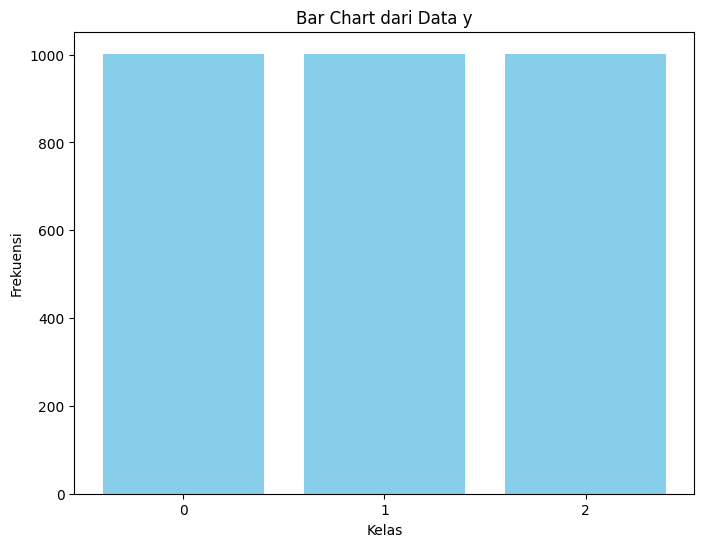

In [ ]:
import matplotlib.pyplot as plt

# Hitung frekuensi masing-masing kelas dalam data y
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Buat bar chart dari frekuensi kelas
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color='skyblue')
plt.title('Bar Chart dari Data y')
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')
plt.xticks(unique_classes)  # Mengatur label sumbu x sesuai dengan kelas unik
plt.show()


In [ ]:
# Periksa statistik dasar (mean, min, max, std)
print("Statistik Deskriptif X_resampled:")
stat_summary_X = X_resampled.describe().T  # Statistik dasar
stat_summary_X["skewness"] = X_resampled.apply(skew)  # Menambahkan skewness
stat_summary_X["kurtosis"] = X_resampled.apply(kurtosis)  # Menambahkan kurtosis

print(stat_summary_X)

# Periksa distribusi target setelah resampling
print("\nDistribusi Label y_resampled:")
print(pd.Series(y_resampled).value_counts())  # Cek distribusi kelas target

# Periksa statistik deskriptif Y (jika numerik)
if np.issubdtype(y_resampled.dtype, np.number):
    print("\nStatistik Deskriptif y_resampled:")
    print(pd.Series(y_resampled).describe())
    print(f"Skewness: {skew(y_resampled)}")
    print(f"Kurtosis: {kurtosis(y_resampled)}")

Statistik Deskriptif X_resampled:
                            count      mean       std  min       25%  \
Age                        3006.0  0.401404  0.101192  0.0  0.331748   
Gender                     3006.0  0.511558  0.187649  0.0  0.416667   
Country                    3006.0  0.777642  0.280864  0.0  0.608696   
state                      3006.0  0.508358  0.207075  0.0  0.488191   
self_employed              3006.0  0.558815  0.185574  0.0  0.500000   
family_history             3006.0  0.315242  0.449751  0.0  0.000000   
treatment                  3006.0  0.479064  0.489979  0.0  0.000000   
work_interfere             3006.0  0.527648  0.385586  0.0  0.180156   
no_employees               3006.0  0.522402  0.308547  0.0  0.277045   
remote_work                3006.0  0.344987  0.456698  0.0  0.000000   
tech_company               3006.0  0.880840  0.307549  0.0  1.000000   
benefits                   3006.0  0.485355  0.394516  0.0  0.000000   
care_options               300

#Pembuatan Model dan Evaluasi XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Jumlah seluruh dataset:", len(X_resampled))
print("Jumlah dataset setelah splitting data untuk training:", len(X_train))
print("Jumlah dataset setelah splitting data untuk testing:", len(X_test))


# Menampilkan ukuran dataset
print("Ukuran dataset:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Jumlah seluruh dataset: 3006
Jumlah dataset setelah splitting data untuk training: 2404
Jumlah dataset setelah splitting data untuk testing: 602
Ukuran dataset:
X_train: (2404, 24), y_train: (2404,)
X_test: (602, 24), y_test: (602,)


In [ ]:
from sklearn.model_selection import KFold

# Tentukan jumlah fold
k = 5
# Inisialisasi k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [ ]:
pip install --upgrade xgboost scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\acer\appdata\local\programs\python\python312\lib\site-packages (2.1.3)




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:08:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       189
           1       0.92      0.92      0.92       214
           2       0.99      1.00      0.99       199

    accuracy                           0.94       602
   macro avg       0.94      0.94      0.94       602
weighted avg       0.94      0.94      0.94       602


AUC (Multi-Class Classification): 0.9935


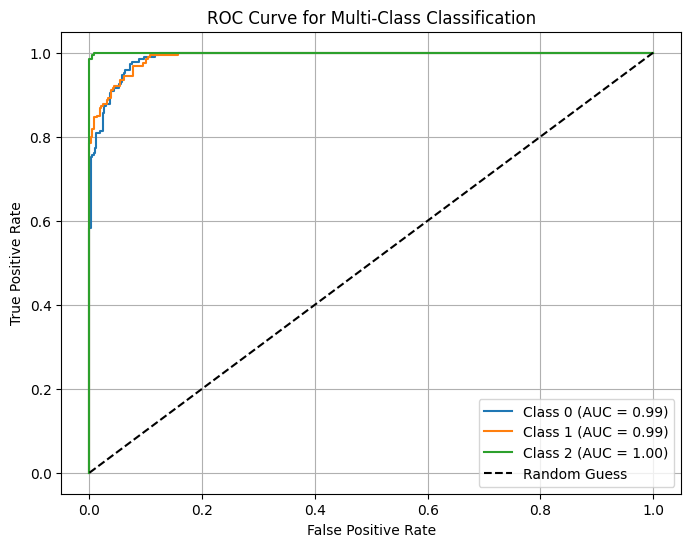

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Inisialisasi model XGBoost dengan parameter default
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Melatih model pada data pelatihan
xgb_model.fit(X_train, y_train)

# Prediksi label pada data uji
y_pred = xgb_model.predict(X_test)

# Prediksi probabilitas untuk data uji
y_pred_prob = xgb_model.predict_proba(X_test)

# Evaluasi model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Hitung AUC untuk multi-class classification
auc_score = roc_auc_score(y_test, y_pred_prob, multi_class='ovo')  # Bisa juga 'ovr'
print(f"\nAUC (Multi-Class Classification): {auc_score:.4f}")

# Visualisasi Kurva ROC untuk Multi-Class
def plot_multiclass_roc(y_test, y_pred_prob, n_classes):
    fpr = {}
    tpr = {}
    roc_auc = {}

    # One-vs-Rest ROC Curve untuk setiap kelas
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot Kurva ROC
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    # Tambahkan diagonal sebagai baseline
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

    # Label dan judul
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Multi-Class Classification")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Pastikan jumlah kelas sesuai dengan label unik di y_test
n_classes = len(np.unique(y_test))
plot_multiclass_roc(y_test, y_pred_prob, n_classes)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.base import BaseEstimator
import numpy as np

# Definisikan kelas CustomXGBClassifier
class CustomXGBClassifier(BaseEstimator):
    def __init__(self, **params):
        self.model = xgb.XGBClassifier(**params)

    def fit(self, X, y):
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep)

# Definisikan grid parameter untuk GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9],              # Kedalaman pohon
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Kecepatan pembelajaran
    'n_estimators': [50, 100, 200, 300],     # Jumlah estimators
    'reg_alpha': [0, 0.01, 0.1, 1.0],        # Regularisasi L1
    'reg_lambda': [0.01, 0.1, 1.0, 10.0],    # Regularisasi L2
}


# Inisialisasi model XGBoost menggunakan kelas CustomXGBClassifier
xgb_model_hyper = CustomXGBClassifier()


# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model_hyper, param_grid=param_grid,
                           scoring='accuracy', cv=kf, verbose=1, n_jobs=-1)

# Melakukan pencarian hyperparameter
grid_search.fit(X_train, y_train)

# Menampilkan hasil GridSearchCV
print("Best parameters from GridSearchCV:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Menilai model terbaik dari GridSearchCV pada data uji
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test)

# Menampilkan classification report untuk model terbaik
print("\nClassification Report (GridSearchCV):")
print(classification_report(y_test, y_pred_grid))

# Prediksi probabilitas untuk data uji
y_pred_prob_grid = best_model_grid.predict_proba(X_test)

# Hitung AUC untuk multi-class classification
auc_score_grid = roc_auc_score(y_test, y_pred_prob_grid, multi_class='ovo')  # Bisa juga 'ovr'
print(f"\nAUC (Multi-Class Classification) from GridSearchCV: {auc_score_grid:.4f}")


Fitting 5 folds for each of 1024 candidates, totalling 5120 fits
Best parameters from GridSearchCV:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 0.01}
Best cross-validation score: 0.9264

Classification Report (GridSearchCV):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       189
           1       0.92      0.92      0.92       214
           2       0.99      1.00      0.99       199

    accuracy                           0.94       602
   macro avg       0.94      0.94      0.94       602
weighted avg       0.94      0.94      0.94       602


AUC (Multi-Class Classification) from GridSearchCV: 0.9935


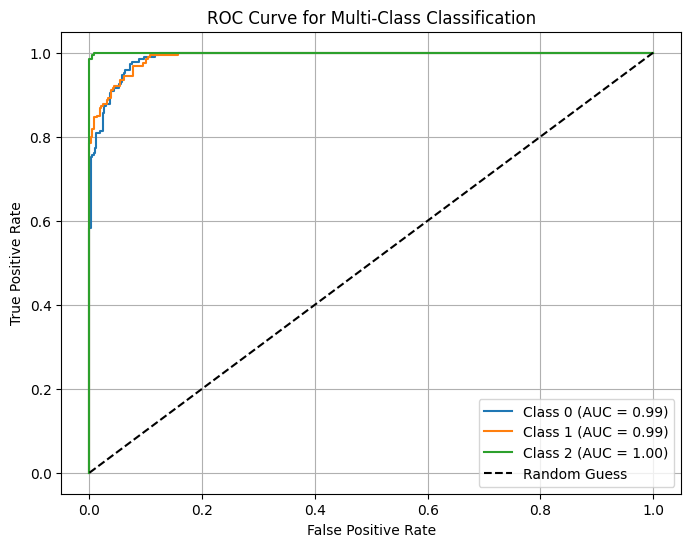

In [ ]:
# Visualisasi Kurva ROC untuk Multi-Class
def plot_multiclass_roc(y_test, y_pred_prob, n_classes):
    fpr = {}
    tpr = {}
    roc_auc = {}

    # One-vs-Rest ROC Curve untuk setiap kelas
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot Kurva ROC
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    # Tambahkan diagonal sebagai baseline
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

    # Label dan judul
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Multi-Class Classification")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Pastikan jumlah kelas sesuai dengan label unik di y_test
n_classes = len(np.unique(y_test))
plot_multiclass_roc(y_test, y_pred_prob_grid, n_classes)


Confusion Matrix:


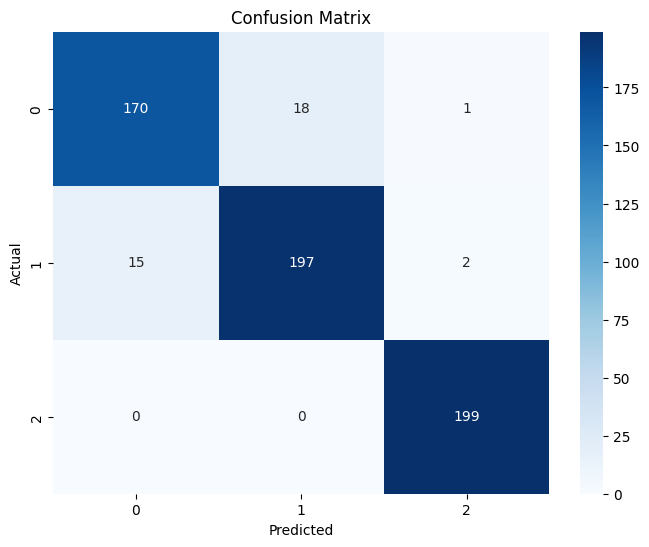

In [ ]:
# Menampilkan confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_grid)
print("\nConfusion Matrix:")

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()